### Getting the Dataset

This example uses the [Data Set 1][bcicomp3ds1] from the BCI Competition 3. After downloading and copying it into a directory called `data` next to this script, you should be able to follow this example.

[bcicomp3ds1]: http://www.bbci.de/competition/iii/#data_set_i


In [1]:
cd /media/data/Dropbox/Prog/python/Projects/wyrm/


/media/data/Dropbox/Prog/python/Import/wyrm


In [2]:
from __future__ import division

import numpy as np
import scipy as sp
from scipy.io import loadmat
from matplotlib import pyplot as plt
import matplotlib as mpl

from wyrm import processing as proc
from wyrm.types import Data
from wyrm import plot
from wyrm.io import load_bcicomp3_ds1
plot.beautify()

from matplotlib import pyplot as plt
%matplotlib inline  

/usr/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [112]:
DATA_DIR = 'TestData/'
# TRUE_LABELS = 'TestData/Competition_train_lab.txt'
# hmmm... I don't have these true labels, unfortunately.

In [4]:
# load test and training data
dat_train, dat_test = load_bcicomp3_ds1(DATA_DIR)

# load true labels
true_labels = np.loadtxt(TRUE_LABELS).astype('int')
# map labels -1 -> 0
true_labels[true_labels == -1] = 0

In [5]:
# TRUE_LABELS  hmmm...

'TestData/Competition_train_lab.txt'

In [6]:
def plot_csp_pattern(a):
    # get symmetric min/max values for the color bar from first and last column of the pattern
    maxv = np.max(np.abs(a[:, [0, -1]]))
    minv = -maxv
    
    im_args = {'interpolation' : 'None', 
           'vmin' : minv, 
           'vmax' : maxv
           }

    # plot
    ax1 = plt.subplot2grid((1,11), (0,0), colspan=5)
    ax2 = plt.subplot2grid((1,11), (0,5), colspan=5)
    ax3 = plt.subplot2grid((1,11), (0,10))

    ax1.imshow(a[:, 0].reshape(8, 8), **im_args)
    ax1.set_title('Pinky')

    ax = ax2.imshow(a[:, -1].reshape(8, 8), **im_args)
    ax2.set_title('Tongue')

    plt.colorbar(ax, cax=ax3)
    plt.tight_layout()

In [7]:
def preprocess(data, filt=None):
    dat = data.copy()
    fs_n = dat.fs / 2
    
    b, a = proc.signal.butter(5, [13 / fs_n], btype='low')
    dat = proc.filtfilt(dat, b, a)
    
    b, a = proc.signal.butter(5, [9 / fs_n], btype='high')
    dat = proc.filtfilt(dat, b, a)
    
    dat = proc.subsample(dat, 50)

    if filt is None:
        filt, pattern, _ = proc.calculate_csp(dat)
        plot_csp_pattern(pattern)
    dat = proc.apply_csp(dat, filt)
    
    dat = proc.variance(dat)
    dat = proc.logarithm(dat)
    return dat, filt

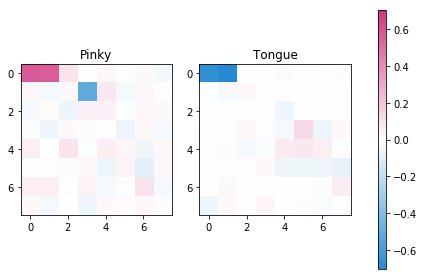

In [150]:
plot_csp_pattern(filt)

<function wyrm.processing.variance>

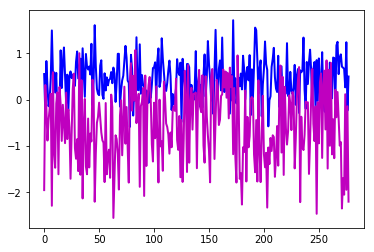

In [136]:
#dat = proc.subsample(dat, 50)
dat.data.shape
dat2 = proc.subsample(dat, 50)
dat2 = proc.apply_csp(dat2, filt)
dat2.data.shape
dat2=proc.variance(dat2)
dat2.data.shape
#plt.plot(dat2.data)
dat2 = proc.logarithm(dat2)
plt.plot(dat2.data)
# data.data.shape
proc.variance

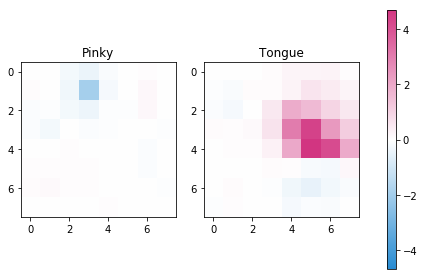

In [8]:
fv_train, filt = preprocess(dat_train)

In [9]:
fv_test, _ = preprocess(dat_test, filt)

In [33]:
t = proc.subsample(dat_test, 50)

t.data.shape

(100, 150, 64)

In [18]:
fv_test.data

array([[ 0.96858734,  0.1907635 ],
       [ 0.6825755 ,  0.57384778],
       [ 1.4182213 , -0.04620223],
       [ 0.49883868, -0.93030077],
       [ 1.19442692, -0.93536363],
       [ 1.25398851, -0.62068494],
       [ 0.85728495, -0.53742692],
       [ 1.04490369, -0.47926516],
       [ 0.50099083,  1.48696691],
       [ 1.22443095, -0.32327331],
       [ 0.34663986,  0.25440021],
       [ 0.30918695,  0.63184752],
       [ 0.53628709,  1.08551187],
       [ 0.65966487, -1.43428038],
       [ 0.46781128,  0.73239709],
       [ 0.68982971,  0.73500287],
       [ 1.28346808,  0.57138479],
       [ 1.92113345, -0.36331682],
       [ 0.86828062,  0.38434106],
       [ 0.42593476,  0.54937623],
       [ 0.68351664,  1.32533948],
       [ 1.04962173, -0.37609991],
       [ 1.6826668 , -1.38204803],
       [ 0.74444619,  0.69784142],
       [ 0.71673674,  0.80040706],
       [ 1.30779957, -1.07734766],
       [-0.24645104,  0.75661168],
       [ 0.26126393,  0.86491104],
       [ 1.57507896,

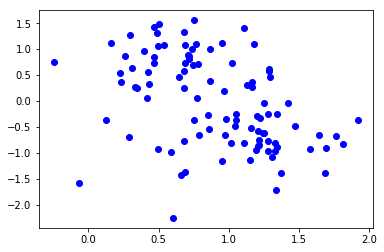

In [57]:
plt.plot(fv_test.data[:,0],fv_test.data[:,1],'o')

In [24]:
filt.shape

(64, 64)

In [106]:
cfy = proc.lda_train(fv_train)
result = proc.lda_apply(fv_test, cfy)
result = (np.sign(result) + 1) / 2

result
# print 'LDA Accuracy %.2f%%' % ((result == true_labels).sum() / len(result))
true_labels
zip(result, true_labels)

[(1.0, 0),
 (1.0, 1),
 (0.0, 0),
 (0.0, 0),
 (0.0, 1),
 (0.0, 1),
 (0.0, 1),
 (0.0, 0),
 (1.0, 1),
 (0.0, 0),
 (1.0, 0),
 (1.0, 0),
 (1.0, 1),
 (0.0, 0),
 (1.0, 1),
 (1.0, 0),
 (1.0, 1),
 (0.0, 1),
 (1.0, 0),
 (1.0, 1),
 (1.0, 0),
 (0.0, 0),
 (0.0, 1),
 (1.0, 0),
 (1.0, 0),
 (0.0, 1),
 (1.0, 1),
 (1.0, 1),
 (0.0, 0),
 (1.0, 0),
 (1.0, 0),
 (0.0, 0),
 (1.0, 1),
 (0.0, 0),
 (1.0, 1),
 (1.0, 0),
 (1.0, 1),
 (1.0, 1),
 (0.0, 0),
 (1.0, 0),
 (1.0, 0),
 (0.0, 0),
 (1.0, 1),
 (0.0, 0),
 (1.0, 1),
 (0.0, 1),
 (0.0, 0),
 (1.0, 0),
 (1.0, 1),
 (0.0, 1),
 (0.0, 1),
 (0.0, 0),
 (1.0, 0),
 (0.0, 0),
 (0.0, 1),
 (0.0, 0),
 (0.0, 1),
 (0.0, 0),
 (1.0, 1),
 (0.0, 0),
 (0.0, 0),
 (0.0, 1),
 (0.0, 1),
 (0.0, 0),
 (1.0, 0),
 (1.0, 1),
 (1.0, 1),
 (0.0, 0),
 (1.0, 0),
 (0.0, 1),
 (1.0, 0),
 (0.0, 0),
 (1.0, 1),
 (0.0, 1),
 (1.0, 0),
 (1.0, 0),
 (1.0, 0),
 (0.0, 0),
 (1.0, 1),
 (1.0, 1),
 (0.0, 0),
 (1.0, 1),
 (0.0, 1),
 (1.0, 1),
 (1.0, 0),
 (0.0, 1),
 (0.0, 1),
 (0.0, 0),
 (0.0, 1),
 (0.0, 1),
 (0.0, 1),

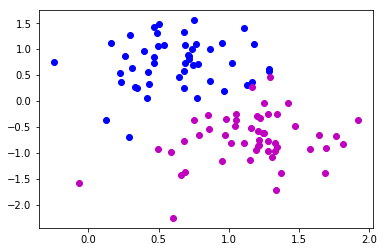

In [77]:
#print np.nonzero(result)
plt.plot(fv_test.data[np.nonzero(result),0].squeeze(),fv_test.data[np.nonzero(result),1].squeeze(),'o')
plt.plot(fv_test.data[np.nonzero(result-1),0].squeeze(),fv_test.data[np.nonzero(result-1),1].squeeze(),'o')



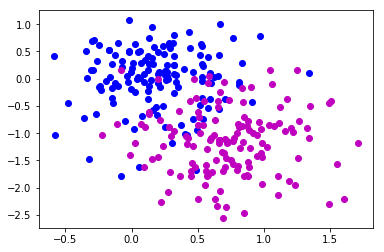

In [91]:
plt.plot(fv_train.data[np.nonzero(dat_train.axes[0]),0].squeeze(),fv_train.data[np.nonzero(dat_train.axes[0]),1].squeeze(),'o')
plt.plot(fv_train.data[np.nonzero(dat_train.axes[0]-1),0].squeeze(),fv_train.data[np.nonzero(dat_train.axes[0]-1),1].squeeze(),'o')

In [96]:
t=[x == y for (x,y) in zip(result,true_labels)]

In [111]:
zip(fv_train.axes[0],true_labels)

[(0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 